In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121


import cv2
import os

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

#### If you are running it for the first time, please uncomment and run below code cell

In [2]:
# import splitfolders

# input_folder='/Users/srinikhildurisetti/Documents/snk/mscs-coursework/ML/ML_project/data_bkup/Alzeihmers_MRI_dataset/Dataset'

# output_folder='/Users/srinikhildurisetti/Documents/snk/mscs-coursework/ML/ML_project/data_bkup/Alzeihmers_MRI_dataset/splitted'

# train_ratio=0.8
# validation_ratio=0.1
# test_ratio=0.1
# splitfolders.ratio(input_folder, output_folder, seed=42,
#                    ratio=(train_ratio,
#                           validation_ratio,
#                           test_ratio))

In [3]:
def load_data (path):
  loaded_images = []
  for image_file in os.listdir(path):
    image_path = os.path.join(path, image_file)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    loaded_images.append(image_rgb)
  return np.array(loaded_images)

In [4]:
# Change the data_path where the splitted data is placed, i.e. output_folder path from the 2nd code cell

data_path='/Users/srinikhildurisetti/Documents/snk/mscs-coursework/ML/ML_project/data_bkup/Alzeihmers_MRI_dataset/splitted'

mild_demented_images = load_data(os.path.join(data_path, "train", "Mild_Demented"))
moderate_demented_images = load_data(os.path.join(data_path, "train", "Moderate_Demented"))
non_demented_images = load_data(os.path.join(data_path, "train", "Non_Demented"))
very_mild_demented_images = load_data(os.path.join(data_path, "train", "Very_Mild_Demented"))


print(f"Number of Mild Demented Images: {len(mild_demented_images)}")
print(f"Number of Moderate Demented Images: {len(moderate_demented_images)}")
print(f"Number of Non Demented Images: {len(non_demented_images)}")
print(f"Number of Very Mild Demented Images: {len(very_mild_demented_images)}")

Number of Mild Demented Images: 716
Number of Moderate Demented Images: 51
Number of Non Demented Images: 2560
Number of Very Mild Demented Images: 1792


In [5]:
num_samples = 4000

data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
                    shear_range=0.15, zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

In [6]:
augmented_images = []
for i in range(mild_demented_images.shape[0]):
    image = mild_demented_images[i]
    image = np.expand_dims(image, 0)
    augmentation_iterator = data_generator.flow(image)
    for j in range(6):
        augmented_image = next(augmentation_iterator)[0].astype(np.uint8)
        augmented_images.append(augmented_image)

augmented_images = np.array(augmented_images)
# print(augmented_images.shape)
augmented_mild_demented_images = np.concatenate((mild_demented_images, augmented_images), axis=0)
augmented_mild_demented_images = augmented_mild_demented_images[:num_samples]
print(f"Shape of Augmented Mild Demented Images: {augmented_mild_demented_images.shape}")



augmented_images = []
for i in range(moderate_demented_images.shape[0]):
    image = moderate_demented_images[i]
    image = np.expand_dims(image, 0)
    augmentation_iterator = data_generator.flow(image)
    for j in range(81):
        augmented_image = next(augmentation_iterator)[0].astype(np.uint8)
        augmented_images.append(augmented_image)

augmented_images = np.array(augmented_images)
# print(augmented_images.shape)
augmented_moderate_demented_images = np.concatenate((moderate_demented_images, augmented_images), axis=0)
augmented_moderate_demented_images = augmented_moderate_demented_images[:num_samples]
print(f"Shape of Augmented Moderate Demented Images: {augmented_moderate_demented_images.shape}")



augmented_images = []
for i in range(non_demented_images.shape[0]):
    image = non_demented_images[i]
    image = np.expand_dims(image, 0)
    augmentation_iterator = data_generator.flow(image)
    for j in range(2):
        augmented_image = next(augmentation_iterator)[0].astype(np.uint8)
        augmented_images.append(augmented_image)

augmented_images = np.array(augmented_images)
# print(augmented_images.shape)
augmented_non_demented_images = np.concatenate((non_demented_images, augmented_images), axis=0)
augmented_non_demented_images = augmented_non_demented_images[:num_samples]
print(f"Shape of Augmented Non Demented Images: {augmented_non_demented_images.shape}")


augmented_images = []
for i in range(very_mild_demented_images.shape[0]):
    image = non_demented_images[i]
    image = np.expand_dims(image, 0)
    augmentation_iterator = data_generator.flow(image)
    for j in range(3):
        augmented_image = next(augmentation_iterator)[0].astype(np.uint8)
        augmented_images.append(augmented_image)

augmented_images = np.array(augmented_images)
# print(augmented_images.shape)
augmented_very_mild_demented_images = np.concatenate((very_mild_demented_images, augmented_images), axis=0)
augmented_very_mild_demented_images = augmented_very_mild_demented_images[:num_samples]
print(f"Shape of Augmented Very Mild Demented Images: {augmented_very_mild_demented_images.shape}")


Shape of Augmented Mild Demented Images: (4000, 128, 128, 3)
Shape of Augmented Moderate Demented Images: (4000, 128, 128, 3)
Shape of Augmented Non Demented Images: (4000, 128, 128, 3)
Shape of Augmented Very Mild Demented Images: (4000, 128, 128, 3)


In [7]:
augmented_mild_demented_labels = np.zeros((num_samples,))
augmented_moderate_demented_labels = np.ones((num_samples,))
augmented_non_demented_labels = np.ones((num_samples,))*2
augmented_very_mild_demented_labels = np.ones((num_samples,))*3

# print(augmented_mild_demented_labels.shape)
# print(augmented_moderate_demented_labels.shape)
# print(augmented_non_demented_labels.shape)
# print(augmented_very_mild_demented_labels.shape)

In [8]:
X_train = np.concatenate((augmented_mild_demented_images, augmented_moderate_demented_images, augmented_non_demented_images, augmented_very_mild_demented_images), axis=0)
y_train = np.concatenate((augmented_mild_demented_labels, augmented_moderate_demented_labels, augmented_non_demented_labels, augmented_very_mild_demented_labels), axis=0)

random_seed = 42
np.random.seed(random_seed)

indices = np.arange(len(X_train))
np.random.shuffle(indices)

X_train_shuffled = X_train[indices]
y_train_shuffled = y_train[indices]

X_train = X_train_shuffled
y_train = y_train_shuffled

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (16000, 128, 128, 3)
Shape of y_train: (16000,)


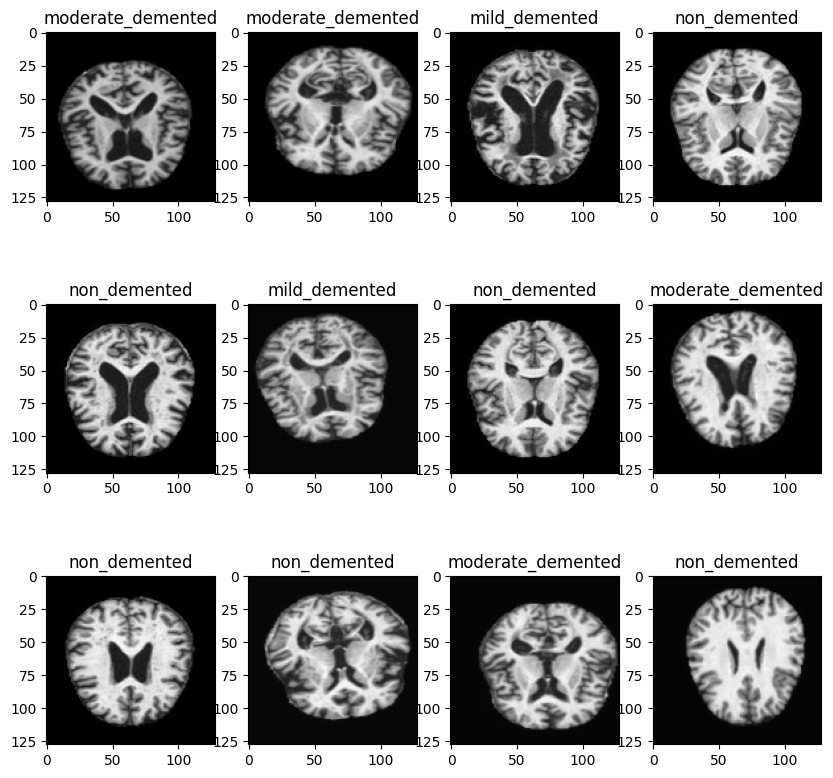

In [9]:
fig=plt.figure(figsize=(10,10))
rows, columns = 3, 4

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('mild_demented')
    elif y_train[i] == 1:
        plt.title('moderate_demented')
    elif y_train[i] == 2:
        plt.title('non_demented')
    elif y_train[i] == 3:
        plt.title('very_mild_demented')
    
plt.show()

In [10]:
#Loading Validation Data

mild_demented_images = load_data(os.path.join(data_path, "val", "Mild_Demented"))
moderate_demented_images = load_data(os.path.join(data_path, "val", "Moderate_Demented"))
non_demented_images = load_data(os.path.join(data_path, "val", "Non_Demented"))
very_mild_demented_images = load_data(os.path.join(data_path, "val", "Very_Mild_Demented"))

print(f"Number of Validation Mild Demented Images: {len(mild_demented_images)}")
print(f"Number of Validation Moderate Demented Images: {len(moderate_demented_images)}")
print(f"Number of Validation Non Demented Images: {len(non_demented_images)}")
print(f"Number of Validation Very Mild Demented Images: {len(very_mild_demented_images)}")

mild_demented_labels = np.zeros(len(mild_demented_images))
moderate_demented_labels = np.ones(len(moderate_demented_images))
non_demented_labels = np.ones(len(non_demented_images))*2
very_mild_demented_labels = np.ones(len(very_mild_demented_images))*3

X_val = np.concatenate((mild_demented_images, moderate_demented_images, non_demented_images, very_mild_demented_images), axis=0)
y_val = np.concatenate((mild_demented_labels, moderate_demented_labels, non_demented_labels, very_mild_demented_labels), axis=0)
# print(X_val.shape)
# print(y_val.shape)

random_seed = 42
np.random.seed(random_seed)

indices = np.arange(len(X_val))
np.random.shuffle(indices)

X_val_shuffled = X_val[indices]
y_val_shuffled = y_val[indices]

X_val = X_val_shuffled
y_val = y_val_shuffled

print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Number of Validation Mild Demented Images: 89
Number of Validation Moderate Demented Images: 6
Number of Validation Non Demented Images: 320
Number of Validation Very Mild Demented Images: 224
Shape of X_val: (639, 128, 128, 3)
Shape of y_val: (639,)


In [11]:
# Loading Test Data

mild_demented_images = load_data(os.path.join(data_path, "test", "Mild_Demented"))
moderate_demented_images = load_data(os.path.join(data_path, "test", "Moderate_Demented"))
non_demented_images = load_data(os.path.join(data_path, "test", "Non_Demented"))
very_mild_demented_images = load_data(os.path.join(data_path, "test", "Very_Mild_Demented"))

print(f"Number of Test Mild Demented Images: {len(mild_demented_images)}")
print(f"Number of Test Moderate Demented Images: {len(moderate_demented_images)}")
print(f"Number of Test Non Demented Images: {len(non_demented_images)}")
print(f"Number of Test Very Mild Demented Images: {len(very_mild_demented_images)}")

mild_demented_labels = np.zeros(len(mild_demented_images))
moderate_demented_labels = np.ones(len(moderate_demented_images))
non_demented_labels = np.ones(len(non_demented_images))*2
very_mild_demented_labels = np.ones(len(very_mild_demented_images))*3

# print(mild_demented_labels.shape)
# print(moderate_demented_labels.shape)
# print(non_demented_labels.shape)
# print(very_mild_demented_labels.shape)

X_test = np.concatenate((mild_demented_images, moderate_demented_images, non_demented_images, very_mild_demented_images), axis=0)
y_test = np.concatenate((mild_demented_labels, moderate_demented_labels, non_demented_labels, very_mild_demented_labels), axis=0)
# print(X_test.shape)
# print(y_test.shape)

random_seed = 42
np.random.seed(random_seed)

indices = np.arange(len(X_test))
np.random.shuffle(indices)

X_test_shuffled = X_test[indices]
y_test_shuffled = y_test[indices]

X_test = X_test_shuffled
y_test = y_test_shuffled

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Number of Test Mild Demented Images: 91
Number of Test Moderate Demented Images: 7
Number of Test Non Demented Images: 320
Number of Test Very Mild Demented Images: 224
Shape of X_test: (642, 128, 128, 3)
Shape of y_test: (642,)


## CNN Architecture

In [12]:
cnn_model = Sequential([
    Conv2D(16, kernel_size=3,activation='relu', input_shape=(128, 128, 3), kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(2),

    Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(2),


    Conv2D(128, kernel_size=3, activation='relu' , kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(2),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')        
])

2024-04-26 14:32:45.742505: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-26 14:32:45.742521: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-26 14:32:45.742524: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-26 14:32:45.742539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-26 14:32:45.742549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,262,692 (12.45 MB)

 Trainable params: 3,262,340 (12.44 MB)

 Non-trainable params: 352 (1.38 KB)

In [14]:
epochs = 10

In [15]:
optimizer = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_cnn = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


2024-04-26 14:32:46.485771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.4909 - loss: 1.8929 - val_accuracy: 0.5524 - val_loss: 1.2618
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7105 - loss: 0.6671 - val_accuracy: 0.4538 - val_loss: 1.2463
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.8194 - loss: 0.4203 - val_accuracy: 0.7778 - val_loss: 0.6967
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.8688 - loss: 0.3030 - val_accuracy: 0.5086 - val_loss: 2.2211
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9110 - loss: 0.2138 - val_accuracy: 0.8607 - val_loss: 0.4409
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9403 - loss: 0.1572 - val_accuracy: 0.8685 - val_loss: 0.4404
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9559 - loss: 0.1208 - val_accuracy: 0.8685 - val_loss: 0.3898
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9710 - loss: 0.0788 - val_accurac

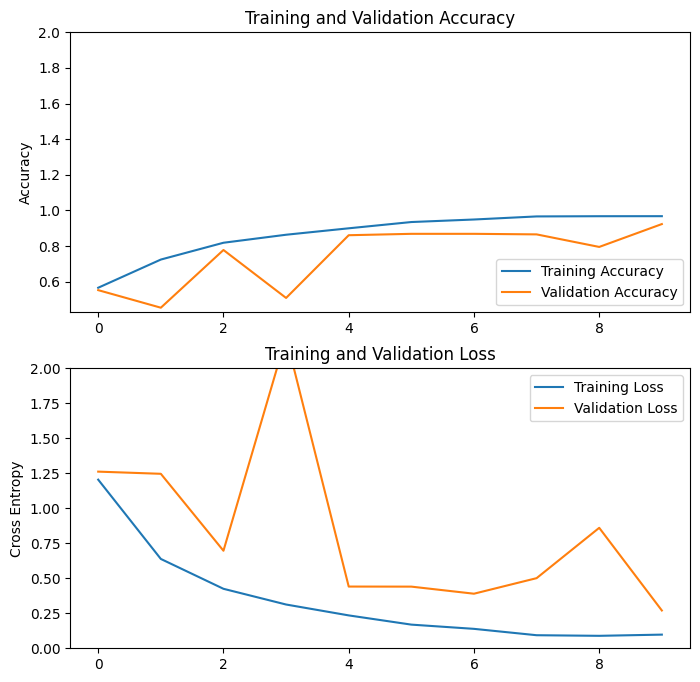

In [17]:
acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']

loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_cnn, label='Training Accuracy')
plt.plot(val_acc_cnn, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_cnn, label='Training Loss')
plt.plot(val_loss_cnn, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 2.0])
plt.title('Training and Validation Loss')

plt.show()

In [18]:
print(cnn_model.evaluate(X_test, y_test))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8930 - loss: 0.3481
[0.33630260825157166, 0.9003115296363831]


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


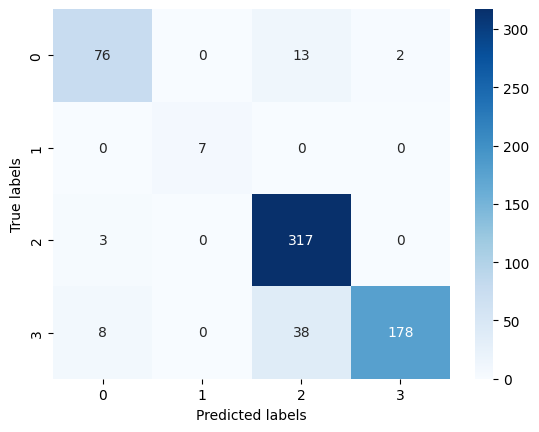

In [19]:
y_pred = cnn_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
confusion_Matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [20]:
print(f"Accuracy of CNN Model: {(accuracy_score(y_test, y_pred_classes)*100):.2f}")

print("Classification report for CNN: ")
print(classification_report(y_test, y_pred_classes))

Accuracy of CNN Model: 90.03
Classification report for CNN: 
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        91
         1.0       1.00      1.00      1.00         7
         2.0       0.86      0.99      0.92       320
         3.0       0.99      0.79      0.88       224

    accuracy                           0.90       642
   macro avg       0.93      0.91      0.91       642
weighted avg       0.91      0.90      0.90       642



## VGG 16

In [21]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in vgg16_model.layers[:-4]:
    layer.trainable = False

In [22]:
vgg_model = Sequential([
     vgg16_model,
     Flatten(),
     Dense(256, activation='relu'),
     Dropout(0.2),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(4, activation='softmax')
 ])

vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [23]:
optimizer = optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history_vgg = vgg_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.3850 - loss: 1.6085 - val_accuracy: 0.5493 - val_loss: 0.9200
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.6539 - loss: 0.7287 - val_accuracy: 0.6088 - val_loss: 0.8087
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.7265 - loss: 0.5746 - val_accuracy: 0.6714 - val_loss: 0.6804
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.7629 - loss: 0.4784 - val_accuracy: 0.6792 - val_loss: 0.6484
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.7898 - loss: 0.4279 - val_accuracy: 0.7246 - val_loss: 0.5879
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.8190 - loss: 0.3580 - val_accuracy: 0.7371 - val_loss: 0.5387
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.8334 - loss: 0.3317 - val_accuracy: 0.7966 - val_loss: 0.4807
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.8457 - loss: 0.3051 - 

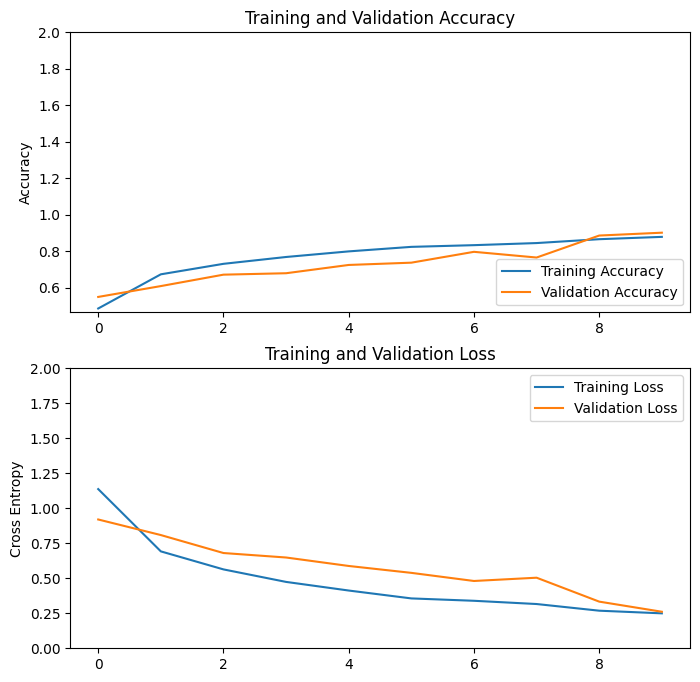

In [25]:
acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']

loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_vgg, label='Training Accuracy')
plt.plot(val_acc_vgg, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_vgg, label='Training Loss')
plt.plot(val_loss_vgg, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 2.0])
plt.title('Training and Validation Loss')

plt.show()

In [26]:
print(vgg_model.evaluate(X_test, y_test))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8572 - loss: 0.3777
[0.3242117166519165, 0.8722741603851318]


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


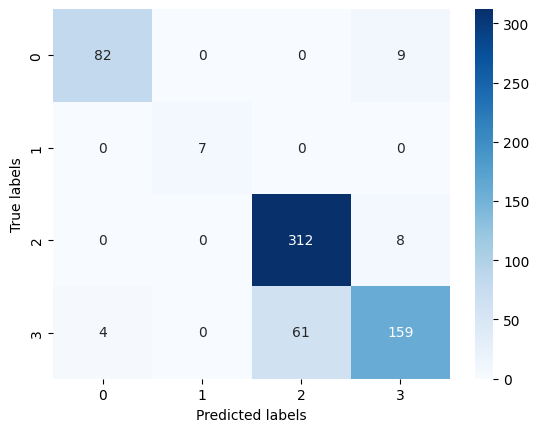

In [27]:
y_pred = vgg_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
confusion_Matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [28]:
print(f"Accuracy of VGG 16 Model: {(accuracy_score(y_test, y_pred_classes)*100):.2f}")

print("Classification report for VGG 16: ")
print(classification_report(y_test, y_pred_classes))

Accuracy of VGG 16 Model: 87.23
Classification report for VGG 16: 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        91
         1.0       1.00      1.00      1.00         7
         2.0       0.84      0.97      0.90       320
         3.0       0.90      0.71      0.80       224

    accuracy                           0.87       642
   macro avg       0.92      0.90      0.91       642
weighted avg       0.88      0.87      0.87       642



## ResNet 50

In [29]:
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in resnet50_model.layers:
    layer.trainable = False

In [30]:
resnet_model = Sequential([
     resnet50_model,
     Flatten(),
     Dense(256, activation='relu'),
     Dropout(0.2),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(4, activation='softmax'),
 ])


resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
optimizer = optimizers.Adam(learning_rate=0.0001)
resnet_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history_resnet = resnet_model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 230ms/step - accuracy: 0.3806 - loss: 1.6017 - val_accuracy: 0.5618 - val_loss: 0.9191
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.5888 - loss: 0.9280 - val_accuracy: 0.5994 - val_loss: 0.8343
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.6517 - loss: 0.7876 - val_accuracy: 0.6463 - val_loss: 0.7900
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.6793 - loss: 0.7279 - val_accuracy: 0.6463 - val_loss: 0.7634
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7038 - loss: 0.6641 - val_accuracy: 0.6635 - val_loss: 0.7506
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.7244 - loss: 0.6231 - val_accuracy: 0.6588 - val_loss: 0.7395
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.7307 - loss: 0.5992 - val_accuracy: 0.6698 - val_loss: 0.7024
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.7552 - loss: 0

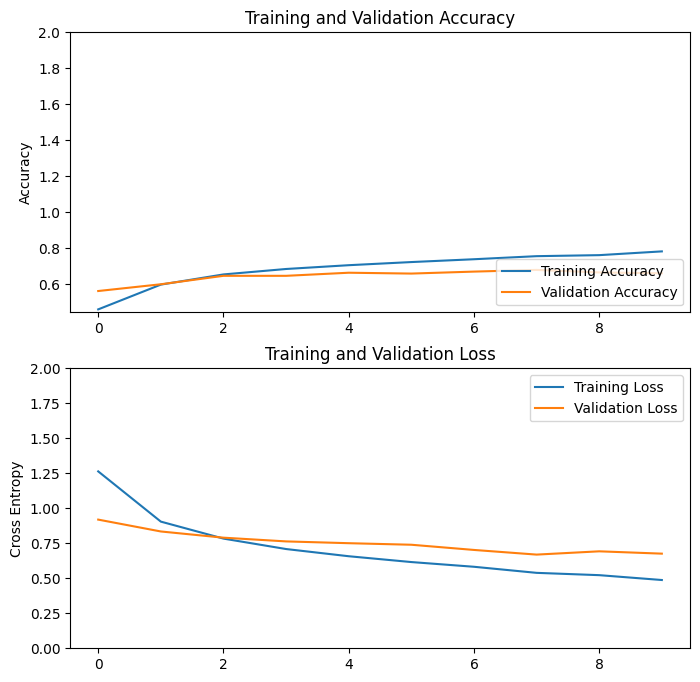

In [33]:
acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']

loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_resnet, label='Training Accuracy')
plt.plot(val_acc_resnet, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_resnet, label='Training Loss')
plt.plot(val_loss_resnet, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 2.0])
plt.title('Training and Validation Loss')

plt.show()

In [34]:
print(resnet_model.evaluate(X_test, y_test))

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.6653 - loss: 0.6992
[0.6725244522094727, 0.6666666865348816]


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


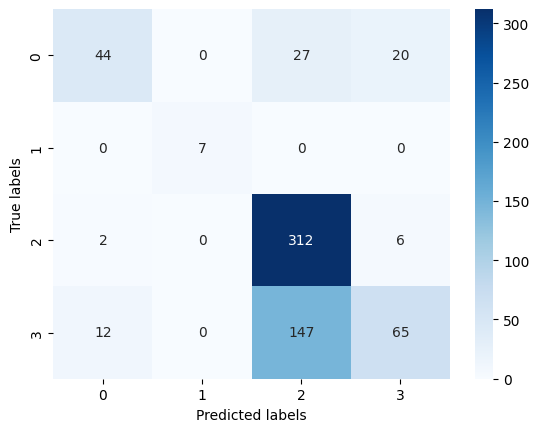

In [35]:
y_pred = resnet_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
confusion_Matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
print(f"Accuracy of ResNet50 Model: {(accuracy_score(y_test, y_pred_classes)*100):.2f}")

print("Classification report for ResNet50: ")
print(classification_report(y_test, y_pred_classes))

Accuracy of ResNet50 Model: 66.67
Classification report for ResNet50: 
              precision    recall  f1-score   support

         0.0       0.76      0.48      0.59        91
         1.0       1.00      1.00      1.00         7
         2.0       0.64      0.97      0.77       320
         3.0       0.71      0.29      0.41       224

    accuracy                           0.67       642
   macro avg       0.78      0.69      0.69       642
weighted avg       0.69      0.67      0.62       642



## DenseNet 121

In [37]:
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in densenet121_model.layers[:-4]:
    layer.trainable = False

In [38]:
densenet_model = Sequential([
     densenet121_model,
     Flatten(),
     Dense(256, activation='relu'),
     Dropout(0.2),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(4, activation='softmax'),
 ])


densenet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 38,912 (152.00 KB)

 Non-trainable params: 6,998,592 (26.70 MB)

In [39]:
optimizer = optimizers.Adam(learning_rate=0.0001)
densenet_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history_densenet = densenet_model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.4391 - loss: 1.2757 - val_accuracy: 0.5775 - val_loss: 0.9036
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.5910 - loss: 0.8969 - val_accuracy: 0.5603 - val_loss: 0.8643
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.6453 - loss: 0.7808 - val_accuracy: 0.6260 - val_loss: 0.7953
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.6802 - loss: 0.7117 - val_accuracy: 0.6510 - val_loss: 0.7586
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.7040 - loss: 0.6532 - val_accuracy: 0.6510 - val_loss: 0.7421
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.7184 - loss: 0.6240 - val_accuracy: 0.6839 - val_loss: 0.7150
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.7293 - loss: 0.5918 - val_accuracy: 0.6901 - val_loss: 0.6731
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.7468 - loss: 0

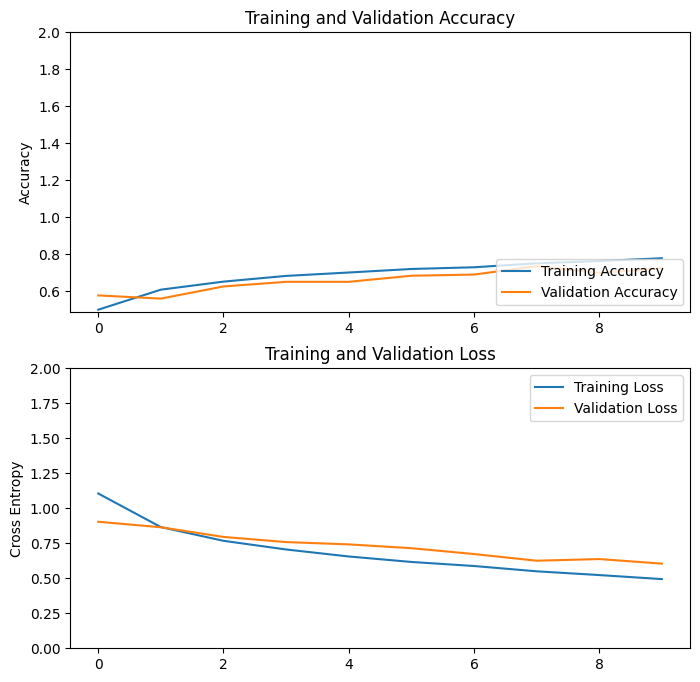

In [41]:
acc_densenet = history_densenet.history['accuracy']
val_acc_densenet = history_densenet.history['val_accuracy']

loss_densenet = history_densenet.history['loss']
val_loss_densenet = history_densenet.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_densenet, label='Training Accuracy')
plt.plot(val_acc_densenet, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_densenet, label='Training Loss')
plt.plot(val_loss_densenet, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 2.0])
plt.title('Training and Validation Loss')

plt.show()

In [42]:
print(densenet_model.evaluate(X_test, y_test))

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.7391 - loss: 0.6192
[0.5868678689002991, 0.7414330244064331]


21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 506ms/step


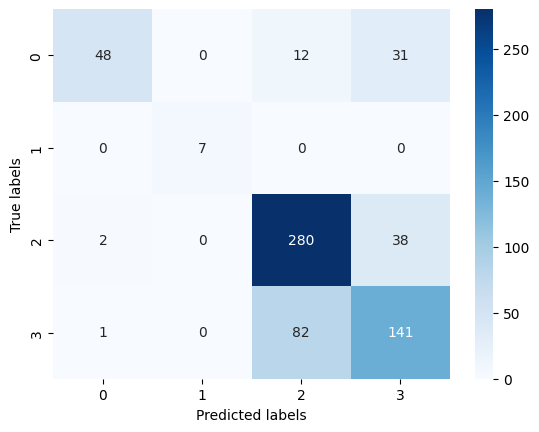

In [43]:
y_pred = densenet_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
confusion_Matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [44]:
print(f"Accuracy of DenseNet121 Model: {(accuracy_score(y_test, y_pred_classes)*100):.2f}")

print("Classification report for DenseNet121: ")
print(classification_report(y_test, y_pred_classes))

Accuracy of DenseNet121 Model: 74.14
Classification report for DenseNet121: 
              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68        91
         1.0       1.00      1.00      1.00         7
         2.0       0.75      0.88      0.81       320
         3.0       0.67      0.63      0.65       224

    accuracy                           0.74       642
   macro avg       0.84      0.76      0.78       642
weighted avg       0.75      0.74      0.74       642



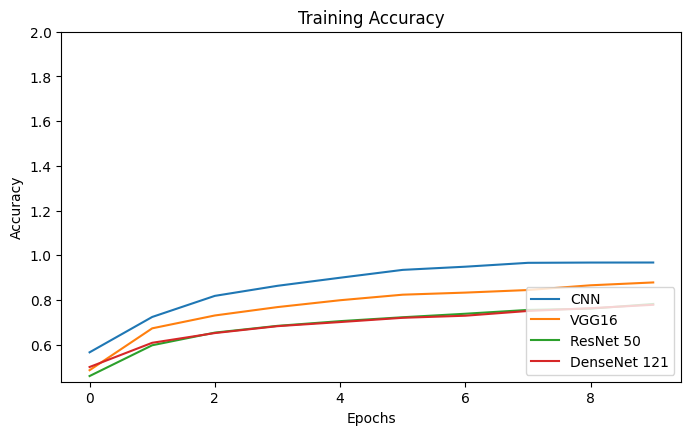

In [45]:
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
plt.plot(acc_cnn, label='CNN')
plt.plot(acc_vgg, label='VGG16')
plt.plot(acc_resnet, label='ResNet 50')
plt.plot(acc_densenet, label='DenseNet 121')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training Accuracy')

plt.show()

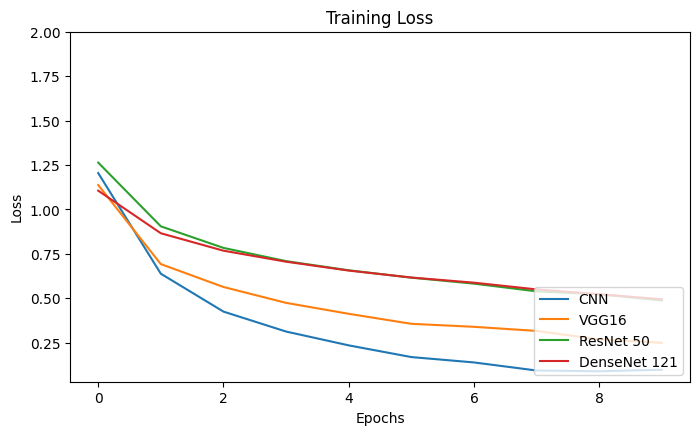

In [46]:
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
plt.plot(loss_cnn, label='CNN')
plt.plot(loss_vgg, label='VGG16')
plt.plot(loss_resnet, label='ResNet 50')
plt.plot(loss_densenet, label='DenseNet 121')
plt.legend(loc = 'lower right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()), 2])
plt.title('Training Loss')

plt.show()

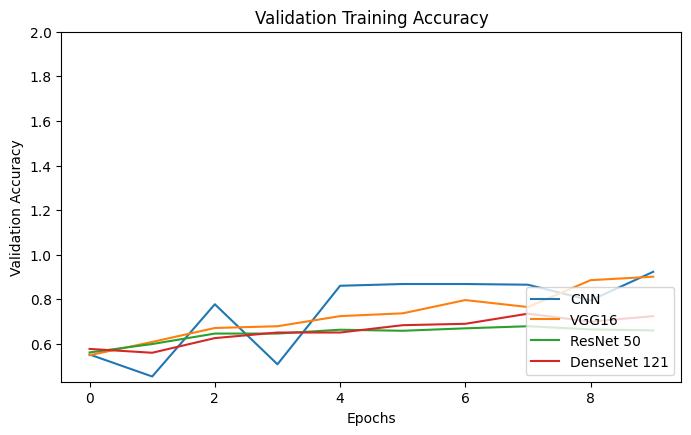

In [47]:
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
plt.plot(val_acc_cnn, label='CNN')
plt.plot(val_acc_vgg, label='VGG16')
plt.plot(val_acc_resnet, label='ResNet 50')
plt.plot(val_acc_densenet, label='DenseNet 121')
plt.legend(loc = 'lower right')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()), 2])
plt.title('Validation Training Accuracy')

plt.show()

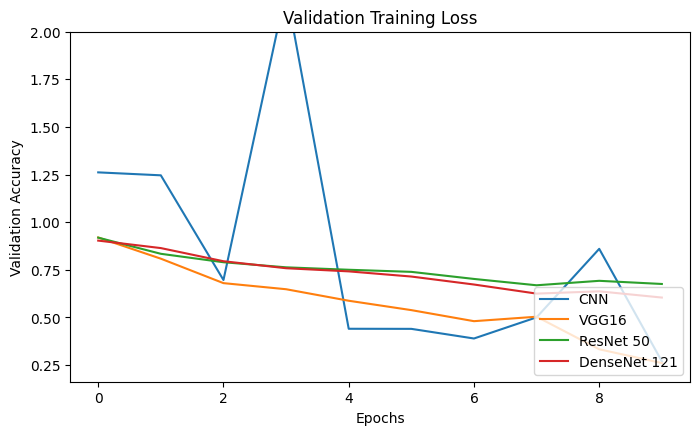

In [48]:
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
plt.plot(val_loss_cnn, label='CNN')
plt.plot(val_loss_vgg, label='VGG16')
plt.plot(val_loss_resnet, label='ResNet 50')
plt.plot(val_loss_densenet, label='DenseNet 121')
plt.legend(loc = 'lower right')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()), 2])
plt.title('Validation Training Loss')

plt.show()